# Part 1: Exploración y Analisis de Datos

## Ajuste Basico de la Data

In [9]:
import numpy as np
import pandas as pd 
from plotnine import *
import matplotlib.pyplot as plt
import os
%matplotlib inline 

In [10]:

sales_train = pd.read_csv('Data/{file}'.format(file='sales_train.csv.gz'),encoding="latin_1",sep=",")
shops = pd.read_csv(os.path.join('Data', 'shops.csv'))
items = pd.read_csv(os.path.join('Data', 'items.csv'))
item_cats = pd.read_csv(os.path.join('Data', 'item_categories.csv'))


In [11]:
items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


### Tamaño de la data

In [12]:
print('                        (numero de filas, numero de columnas)')
print('training set          : ', sales_train.shape)
print('num of shops          : ', shops.shape)
print('num of items          : ',items.shape)
print('num of item categories: ',item_cats.shape)

                        (numero de filas, numero de columnas)
training set          :  (2935849, 6)
num of shops          :  (60, 2)
num of items          :  (22170, 3)
num of item categories:  (84, 2)


In [13]:
# Nombre de los atributos de cada data
print("Indices sales: ",sales_train.columns)
print("Indices shops: ",shops.columns)
print("Indices items: ",items.columns)
print("Indices cats : ",item_cats.columns)

Indices sales:  Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')
Indices shops:  Index(['shop_name', 'shop_id'], dtype='object')
Indices items:  Index(['item_name', 'item_id', 'item_category_id'], dtype='object')
Indices cats :  Index(['item_category_name', 'item_category_id'], dtype='object')


### Merge sales con el resto del datasets

In [14]:
data=pd.merge(sales_train,shops,how='left',on='shop_id')
data=pd.merge(data,items,how='left',on='item_id')
data=pd.merge(data,item_cats,how='left',on='item_category_id')

In [15]:
data

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.00,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,03.01.2013,0,25,2552,899.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
2,05.01.2013,0,25,2552,899.00,-1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
3,06.01.2013,0,25,2554,1709.05,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил
4,15.01.2013,0,25,2555,1099.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства
...,...,...,...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0,"Москва ТРК ""Атриум""",V/A Nu Jazz Selection (digipack),55,Музыка - CD локального производства
2935845,09.10.2015,33,25,7460,299.00,1.0,"Москва ТРК ""Атриум""",V/A The Golden Jazz Collection 1 2CD,55,Музыка - CD локального производства
2935846,14.10.2015,33,25,7459,349.00,1.0,"Москва ТРК ""Атриум""",V/A The Best Of The 3 Tenors,55,Музыка - CD локального производства
2935847,22.10.2015,33,25,7440,299.00,1.0,"Москва ТРК ""Атриум""",V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57,Музыка - MP3


### Ajustar la variable Date

In [16]:
data['date'] = pd.to_datetime(data['date'], format='%d.%m.%Y')#formato de fecha
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data['day'] = data['date'].dt.day
data['weekday'] = data['date'].dt.weekday
data['weekday_name'] = data['date'].dt.day_name()
data['month_name'] = data['date'].dt.month_name()

## Exploración de los Datos

In [17]:
data

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name,month,year,day,weekday,weekday_name,month_name
0,2013-01-02,0,59,22154,999.00,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,1,2013,2,2,Wednesday,January
1,2013-01-03,0,25,2552,899.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,1,2013,3,3,Thursday,January
2,2013-01-05,0,25,2552,899.00,-1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,1,2013,5,5,Saturday,January
3,2013-01-06,0,25,2554,1709.05,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,1,2013,6,6,Sunday,January
4,2013-01-15,0,25,2555,1099.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,1,2013,15,1,Tuesday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0,"Москва ТРК ""Атриум""",V/A Nu Jazz Selection (digipack),55,Музыка - CD локального производства,10,2015,10,5,Saturday,October
2935845,2015-10-09,33,25,7460,299.00,1.0,"Москва ТРК ""Атриум""",V/A The Golden Jazz Collection 1 2CD,55,Музыка - CD локального производства,10,2015,9,4,Friday,October
2935846,2015-10-14,33,25,7459,349.00,1.0,"Москва ТРК ""Атриум""",V/A The Best Of The 3 Tenors,55,Музыка - CD локального производства,10,2015,14,2,Wednesday,October
2935847,2015-10-22,33,25,7440,299.00,1.0,"Москва ТРК ""Атриум""",V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57,Музыка - MP3,10,2015,22,3,Thursday,October


In [18]:
data.dtypes

date                  datetime64[ns]
date_block_num                 int64
shop_id                        int64
item_id                        int64
item_price                   float64
item_cnt_day                 float64
shop_name                     object
item_name                     object
item_category_id               int64
item_category_name            object
month                          int64
year                           int64
day                            int64
weekday                        int64
weekday_name                  object
month_name                    object
dtype: object

In [19]:
def ConvertirTipoDato(df,column):
    df[column] = df[column].astype('category')
    return(df[column])   

In [20]:
data['shop_name'] = ConvertirTipoDato(data,'shop_name')
data['item_name'] = ConvertirTipoDato(data,'item_name')
data['item_category_name'] = ConvertirTipoDato(data,'item_category_name')
data['weekday_name'] = ConvertirTipoDato(data,'weekday_name')
data['month_name'] = ConvertirTipoDato(data,'month_name')

In [21]:
data.dtypes

date                  datetime64[ns]
date_block_num                 int64
shop_id                        int64
item_id                        int64
item_price                   float64
item_cnt_day                 float64
shop_name                   category
item_name                   category
item_category_id               int64
item_category_name          category
month                          int64
year                           int64
day                            int64
weekday                        int64
weekday_name                category
month_name                  category
dtype: object

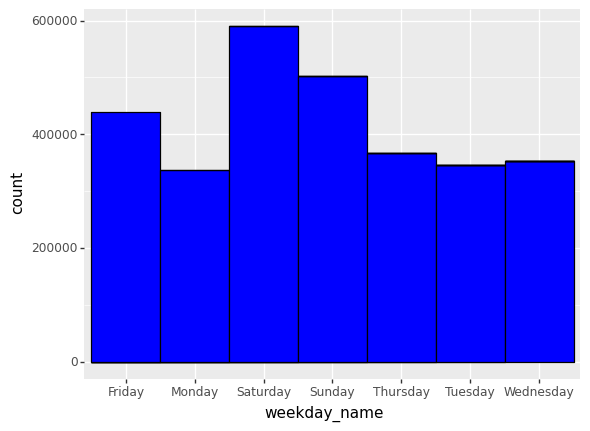

<ggplot: (334193193)>

In [77]:
ggplot(data, aes(x='weekday_name'))\
+ geom_histogram(binwidth=1, color="black", fill="blue")

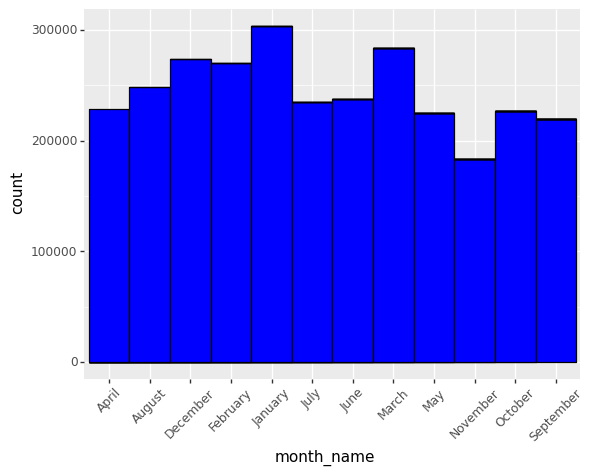

<ggplot: (556048173)>

In [80]:
ggplot(data, aes(x='month_name')) \
+ geom_histogram(binwidth=1, color="black", fill="blue") \
+ theme(axis_text_x=element_text(angle=45))


In [81]:
print("Fecha minima: ",data['date'].min())
print("Fecha maxima: ",data['date'].max())

Fecha minima:  2013-01-01 00:00:00
Fecha maxima:  2015-10-31 00:00:00


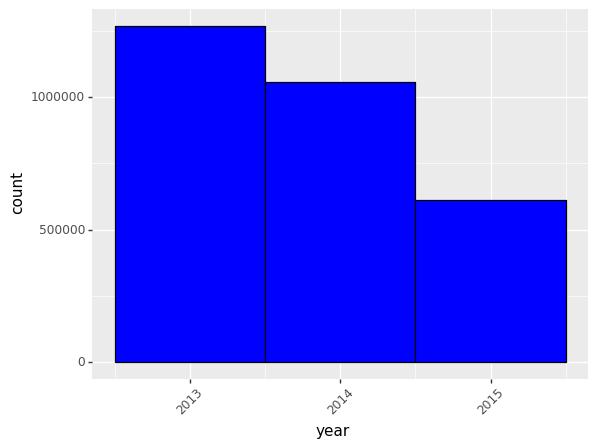

<ggplot: (471870097)>

In [82]:
ggplot(data, aes(x='year')) \
+ geom_histogram(binwidth=1, color="black", fill="blue") \
+ theme(axis_text_x=element_text(angle=45))

### Cuales son los Outlier que existen

¿Por qué son outlier?

Verificar con graficos de puntos y con min-max data.describe()

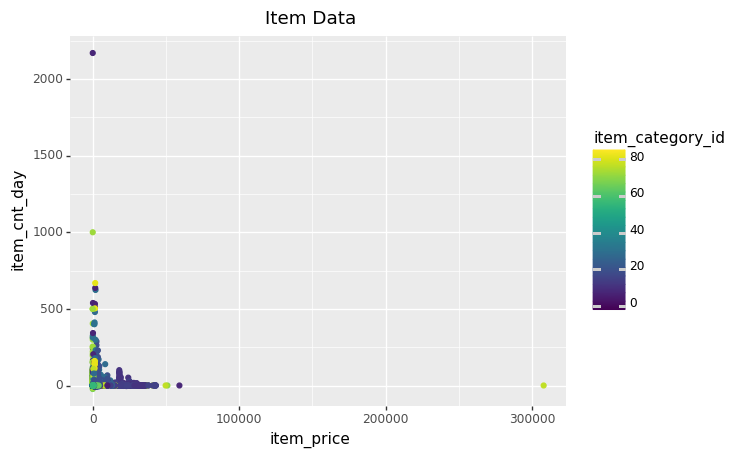

<ggplot: (402478189)>

In [83]:
ggplot(data, aes(y = "item_cnt_day", x = "item_price", color="item_category_id"))\
+  ggtitle("Item Data") + geom_point()

In [22]:
data['item_price'].describe()

count    2.935849e+06
mean     8.908532e+02
std      1.729800e+03
min     -1.000000e+00
25%      2.490000e+02
50%      3.990000e+02
75%      9.990000e+02
max      3.079800e+05
Name: item_price, dtype: float64

Observamos que en los precios hay uno o más objetos con precio negativo, investigaremos para ver cuantos casos son.

In [23]:
data[data['item_price'] <= 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name,month,year,day,weekday,weekday_name,month_name
484683,2013-05-15,4,32,2973,-1.0,1.0,"Москва ТЦ ""Серебряный Дом""","DmC Devil May Cry [PS3, русские субтитры]",19,Игры - PS3,5,2013,15,2,Wednesday,May


Encontramos que solo había un registro para un precio negativo, este precio lo cambiaremos por el promedio del articulo.

In [24]:
PrecioPromedio_2973 = data[data.item_id == 2973]['item_price'].mean()
data.loc[data.index == 484683, 'item_price'] = PrecioPromedio_2973

In [25]:
data.loc[data.index == 484683]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name,month,year,day,weekday,weekday_name,month_name
484683,2013-05-15,4,32,2973,2041.627277,1.0,"Москва ТЦ ""Серебряный Дом""","DmC Devil May Cry [PS3, русские субтитры]",19,Игры - PS3,5,2013,15,2,Wednesday,May


En la grafica observamos que había un dato con un precio extremadamente alto, veremos si existe alguno más.

In [26]:
data[data['item_price'] >= 100000]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name,month,year,day,weekday,weekday_name,month_name
1163158,2013-12-13,11,12,6066,307980.0,1.0,Интернет-магазин ЧС,Radmin 3 - 522 лиц.,75,Программы - Для дома и офиса,12,2013,13,4,Friday,December


observamos que solo existe un dato con un precio por sobre los 100 mil, buscaremos si hay alguna venta más con el id de este producto.

In [27]:
data[data.item_id == 6066]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name,month,year,day,weekday,weekday_name,month_name
1163158,2013-12-13,11,12,6066,307980.0,1.0,Интернет-магазин ЧС,Radmin 3 - 522 лиц.,75,Программы - Для дома и офиса,12,2013,13,4,Friday,December


Observamos que el unico producto vendido con este id, el 1163158, por lo que procedemos a eliminar este registro.

In [28]:
data = data.drop([1163158], axis= 0)

In [29]:
data[data['item_cnt_day'] >= 750]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name,month,year,day,weekday,weekday_name,month_name
2326930,2015-01-15,24,12,20949,4.000000,1000.0,Интернет-магазин ЧС,Фирменный пакет майка 1С Интерес белый (34*42)...,71,"Подарки - Сумки, Альбомы, Коврики д/мыши",1,2015,15,3,Thursday,January
2909818,2015-10-28,33,12,11373,0.908714,2169.0,Интернет-магазин ЧС,Доставка до пункта выдачи (Boxberry),9,Доставка товара,10,2015,28,2,Wednesday,October


In [30]:
data[data.item_id == 20949]['item_cnt_day'].describe()

count    31340.000000
mean         5.987301
std         11.497655
min        -16.000000
25%          2.000000
50%          3.000000
75%          7.000000
max       1000.000000
Name: item_cnt_day, dtype: float64

In [31]:
data[data.item_id == 11373]['item_cnt_day'].describe()

count     464.000000
mean       14.144397
std       104.604937
min         1.000000
25%         2.000000
50%         4.000000
75%         8.000000
max      2169.000000
Name: item_cnt_day, dtype: float64

In [32]:
data = data.drop([2326930], axis= 0)
data = data.drop([2909818], axis= 0)

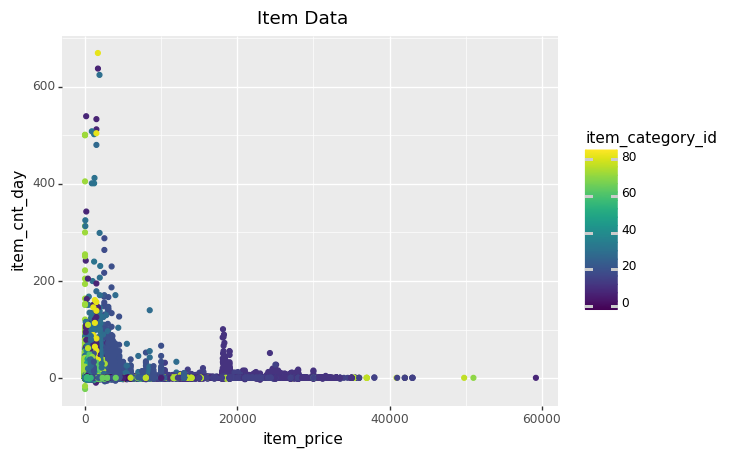

<ggplot: (343796817)>

In [112]:
ggplot(data, aes(y = "item_cnt_day", x = "item_price", color="item_category_id"))\
+  ggtitle("Item Data") + geom_point()

In [33]:
data['beneficio'] = data['item_cnt_day'] * data['item_price']

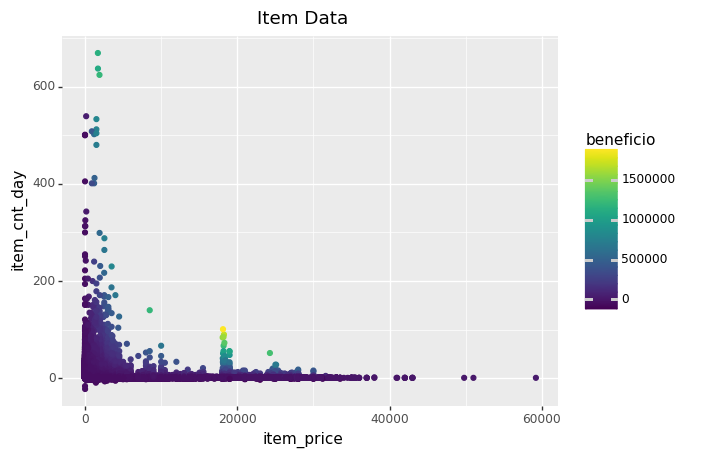

<ggplot: (392126025)>

In [115]:
ggplot(data, aes(y = "item_cnt_day", x = "item_price", color="beneficio"))\
+  ggtitle("Item Data") + geom_point()